# Nivell 1

## Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.



En comptes de dades esportives he agafat dades pluviomètriques acumulades (desprès de parlar-ho amb la Laia) a la ciutat de Barcelona, extretes del meteocat, per mesos des de 1786 fins el 2021 en el següent lloc:

* LAT (º): 41,41864 
* LONG (º): 2,12379
* ALT (m): 411

Mostren cada columna els mm acumulats de pluja per mes. El primer any mostra valors negatius que son els NAs que apareixen a les dades. Per tant el primer any l'eliminarem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pluvi = pd.read_csv('C:/Users/Guillermo/Desktop/Curs Data Scientist/Sprint 5/Barcelona_PPT_m_1786_2021.txt',
                   sep='\t')

In [12]:
pluvi.head()


,ANY,G,F,M,A,M.1,J,J.1,A.1,S,O,N,D
0,1786,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,6.8,52.1,62.0,57.0,195.8,114.1
1,1787,136.4,27.4,44.6,76.9,0.0,29.8,34.7,14.9,205.8,12.4,42.2,0.0
2,1788,9.9,14.9,32.2,12.4,7.5,146.3,59.4,29.8,123.9,163.6,106.6,22.3
3,1789,12.4,12.4,23.6,9.9,32.2,9.9,6.3,69.4,18.7,52.1,18.7,76.9
4,1790,44.6,1.2,188.5,74.4,44.7,39.7,65.7,32.3,71.9,205.8,72.0,14.9


In [13]:
pluvi.tail()

,ANY,G,F,M,A,M.1,J,J.1,A.1,S,O,N,D
231,2017,32.0,31.2,136.4,48.1,20.4,25.9,7.2,17.4,53.3,128.2,15.2,3.1
232,2018,63.6,104.6,112.5,83.0,30.3,53.1,51.5,36.5,44.4,201.9,201.8,4.8
233,2019,18.2,4.6,0.3,36.2,109.0,19.3,75.8,23.1,71.5,83.2,39.4,119.2
234,2020,89.3,2.8,61.6,258.7,29.2,69.1,23.1,12.4,60.2,23.1,52.5,41.5
235,2021,26.2,26.5,7.7,62.7,13.4,7.8,9.0,8.3,23.3,63.0,75.9,3.8


In [26]:
plu2 = pluvi.iloc[1:,]
plu2.shape

(235, 13)

In [22]:
names = pluvi.columns[1:]

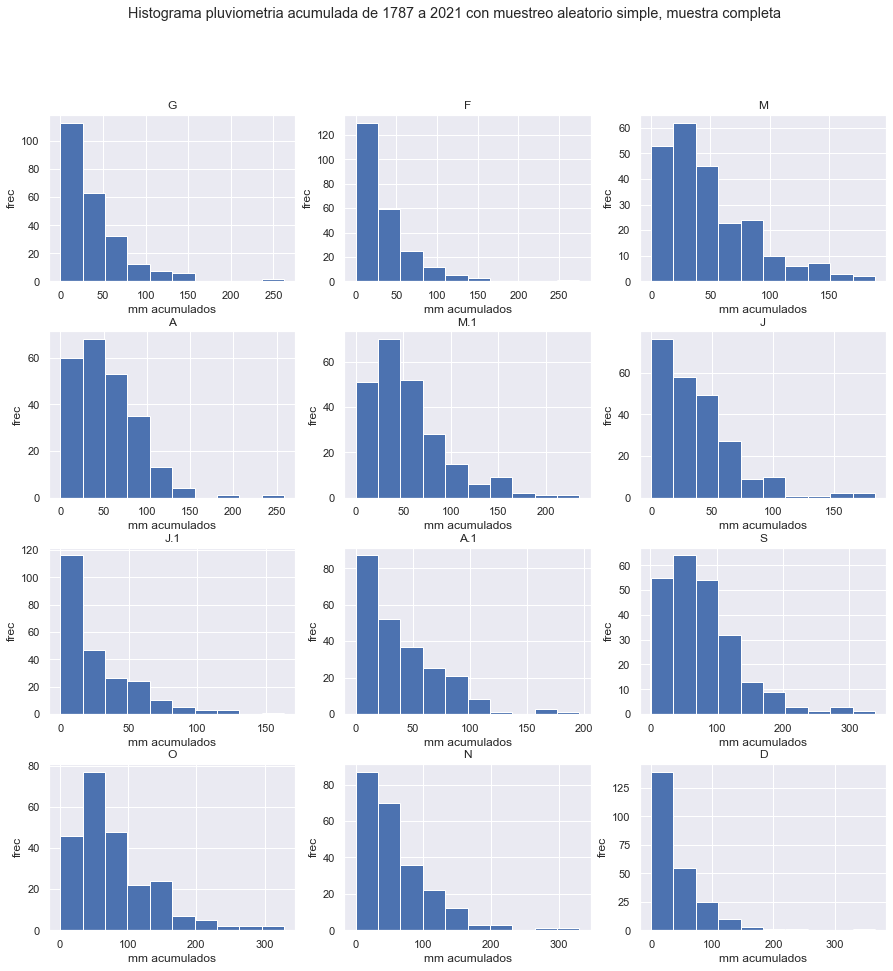

In [83]:
sns.set()
plt.figure(figsize=(15,15))

for i,mes in enumerate(names):
    b = i+1
    plt.subplot(4,3,b)
    plt.hist(plu2[mes])
    plt.xlabel("mm acumulados")
    plt.ylabel('frec')
    plt.title(mes)
    
plt.suptitle('Histograma pluviometria acumulada de 1787 a 2021 con muestreo aleatorio simple, muestra completa')
plt.subplots_adjust(hspace=0.3)
plt.show()

### Mostra aleatòria simple

In [5]:
#Tamany del df
plu2.shape

(235, 13)

In [28]:
plu2MAS = plu2.sample(frac = 0.3)

In [29]:
plu2MAS.shape

(70, 13)

In [30]:
plu2MAS.size

910

In [31]:
names = plu2MAS.columns[1:]

In [32]:
print(names)



Index(['G', 'F', 'M', 'A', 'M.1', 'J', 'J.1', 'A.1', 'S', 'O', 'N', 'D'], dtype='object')


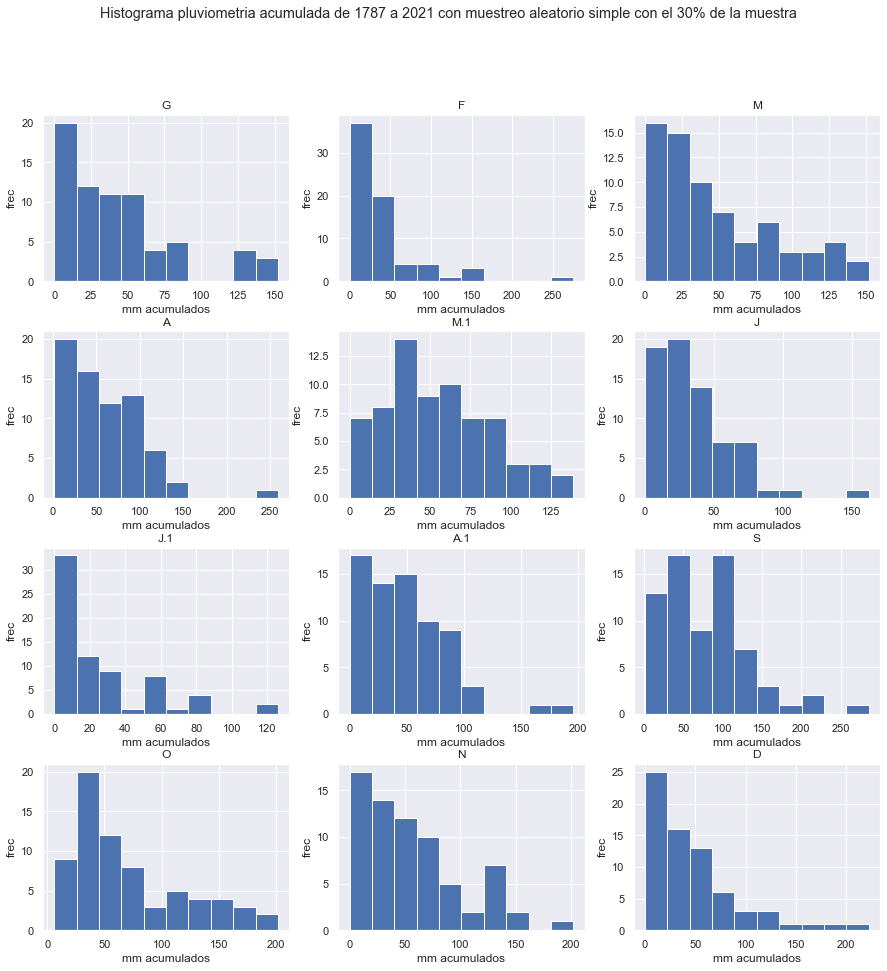

In [82]:
sns.set()
plt.figure(figsize=(15,15))

for i,mes in enumerate(names):
    b = i+1
    plt.subplot(4,3,b)
    plt.hist(plu2MAS[mes])
    plt.xlabel("mm acumulados")
    plt.ylabel('frec')
    plt.title(mes)
    
plt.suptitle('Histograma pluviometria acumulada de 1787 a 2021 con muestreo aleatorio simple con el 30% de la muestra')
plt.subplots_adjust(hspace=0.3)
plt.show()

### Mostra sistemàtica.

Es caracteritza per definir un punt d'inici a l'atzar i agafar el següent objecte de la mostra a partir d'un interval. La decisió de l'interval es pot decidir previament o bé relacionant el tamany de la mostra en funció del número total d'observacions a agafar.

In [78]:
def interval(df,n):
    inter = int(round(len(df)/n,0))
    return inter

inter = interval(plu2, 30)
indexes = np.arange(0,len(plu2), inter)
subsample0 = plu2.iloc[indexes]

len(subsample0)

30

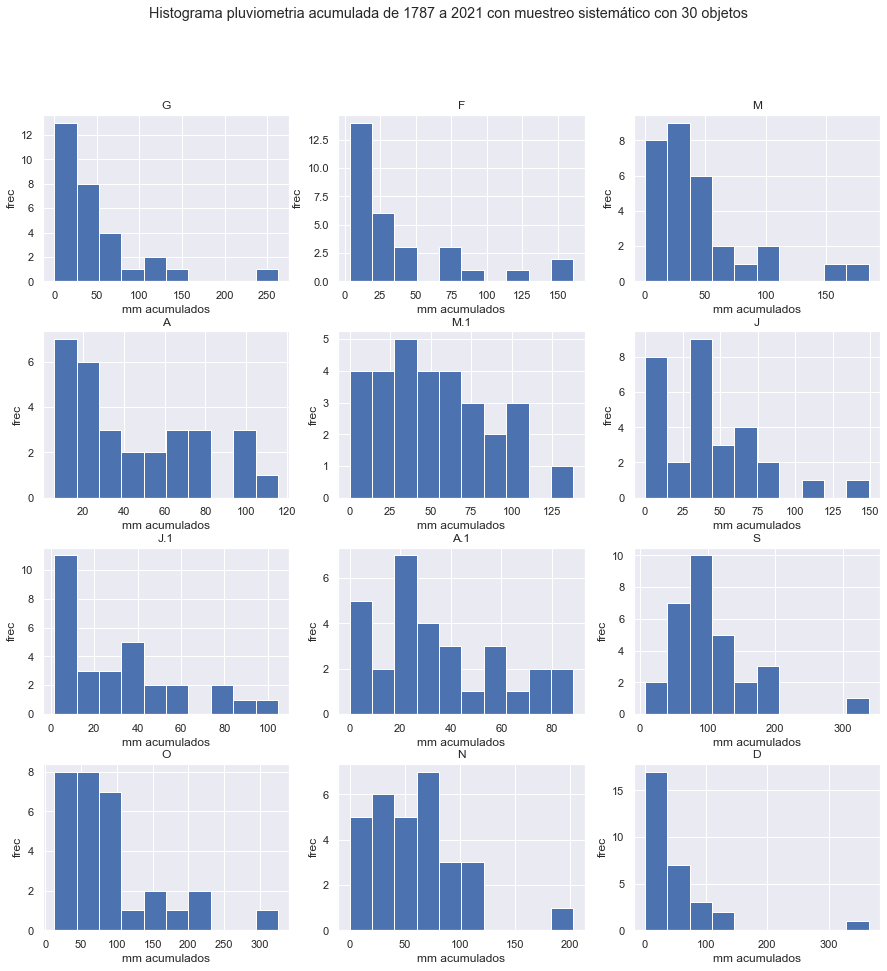

In [81]:
sns.set()
plt.figure(figsize=(15,15))

for i,mes in enumerate(names):
    b = i+1
    plt.subplot(4,3,b)
    plt.hist(subsample0[mes])
    plt.xlabel("mm acumulados")
    plt.ylabel('frec')
    plt.title(mes)
    
plt.suptitle('Histograma pluviometria acumulada de 1787 a 2021 con muestreo sistemático con 30 objetos')
plt.subplots_adjust(hspace=0.3)
plt.show()

En el cas que es vulgui el punt d'inici escollit a l'atzar es farà un mostreig sistemàtic aleatoritzat

In [77]:
inter = interval(plu2,20)

import random
inici = random.randint(1,20)
print(inici)
index = np.arange(inici, len(plu2), inter)
subsample = plu2.iloc[index]

print(len(subsample))

2
20


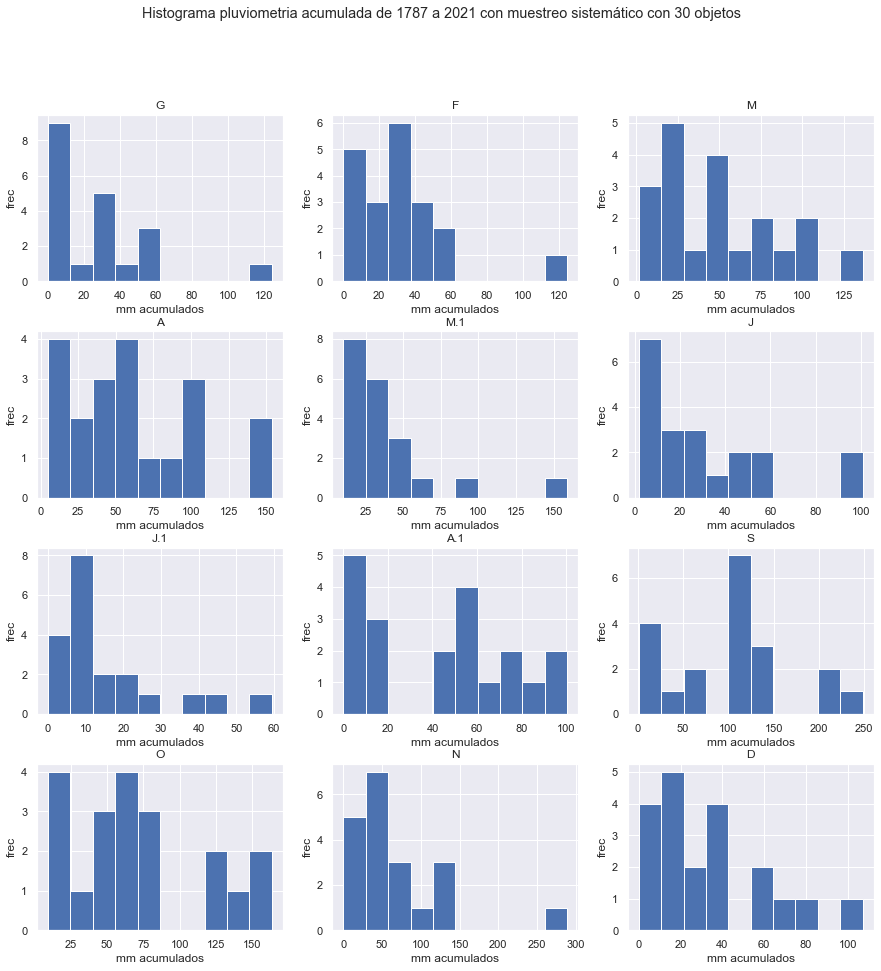

In [84]:
sns.set()
plt.figure(figsize=(15,15))

for i,mes in enumerate(names):
    b = i+1
    plt.subplot(4,3,b)
    plt.hist(subsample[mes])
    plt.xlabel("mm acumulados")
    plt.ylabel('frec')
    plt.title(mes)
    
plt.suptitle('Histograma pluviometria acumulada de 1787 a 2021 con muestreo sistemático con 30 objetos')
plt.subplots_adjust(hspace=0.3)
plt.show()

Evidentment, els histogrames d'aquests dos submostres son molt diferents perquè son mostres petites.